In [1]:
import sys, os
os.chdir('./code/analysis/')
from FigFunctions import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from cmcrameri import cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

os.chdir('../../../data/')

Loading data...


C:\Users\nils\OneDrive - Universität Zürich UZH\Dokumente 1\1_PhD\5_CHAPTER1\paper\github\code\analysis\FigFunctions.py:810: RuntimeWarning: invalid value encountered in true_divide
  return ((NIR - RED) / (NIR + RED))
C:\Users\nils\AppData\Local\Temp\ipykernel_14644\1878501598.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


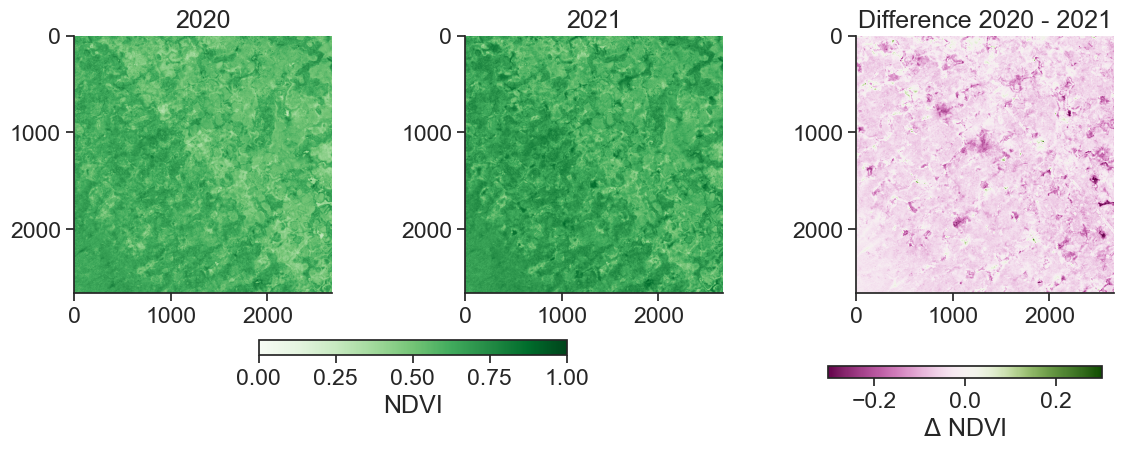

Data for this site is available. Loading ...
done.


C:\Users\nils\OneDrive - Universität Zürich UZH\Dokumente 1\1_PhD\5_CHAPTER1\paper\github\code\analysis\FigFunctions.py:810: RuntimeWarning: invalid value encountered in true_divide
  return ((NIR - RED) / (NIR + RED))
C:\Users\nils\AppData\Local\Temp\ipykernel_14644\1878501598.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


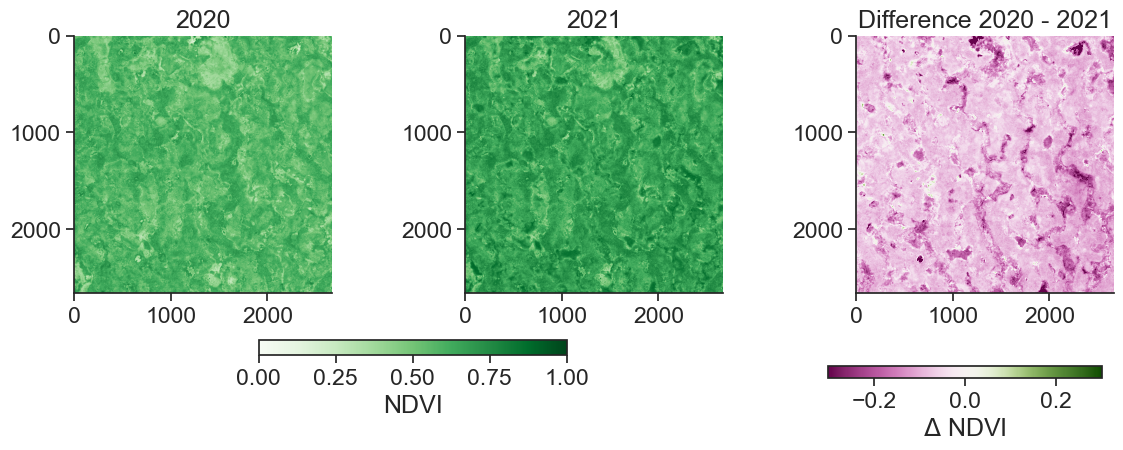

Data for this site is available. Loading ...
done.


C:\Users\nils\OneDrive - Universität Zürich UZH\Dokumente 1\1_PhD\5_CHAPTER1\paper\github\code\analysis\FigFunctions.py:810: RuntimeWarning: invalid value encountered in true_divide
  return ((NIR - RED) / (NIR + RED))
C:\Users\nils\AppData\Local\Temp\ipykernel_14644\1878501598.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


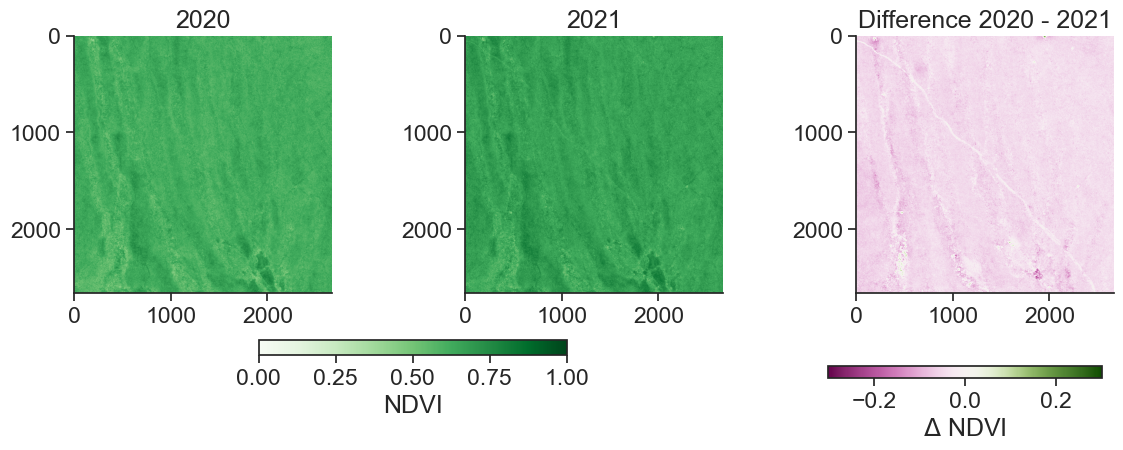

Data for this site is available. Loading ...
done.


In [54]:
# configure variables
seed = 15
study_area_sidelength = 400 # in m
dxy = int(study_area_sidelength / .15) # 667 pixels along 100m ==> 1 ha


# Class labels and values for land cover raster
classdict = {0:'HP1',
             1:'LW1',
             2:'HP2',
             3:'water',
             4:'LW2',
             5:'mud',
             7:'TS',
             255:'nodata'}

# Color scheme for plots
colordict = dict(HP1 = '#AAFF00', 
                 HP2 = '#38A800', 
                 LW1 = '#00FFC5',
                 LW2 = '#A90EFF',
                 TS = '#3D3242',
                 mud = '#734C00',
                 water = '#005CE6')

print('Loading data...')

df_fluxtower = read_fluxtower('./tables/CR3000_Kytalyk_Meteo.dat')

parser = lambda date: pd.to_datetime(date,format='%d.%m.%Y %H:%M').tz_localize('Asia/Srednekolymsk')
df_flighttimes = pd.read_csv('./tables/flight_times.csv', 
                             sep = ';', 
                             parse_dates = [4,5],
                             date_parser=parser)

sites = ['CBH', 'TLB', 'Ridge']

df_list = list(range(3))

I_cl_list = list()
I_wdi_20_list = list()
I_wdi_21_list = list()

# Create the index levels
years = [2020, 2021] * 3
multi_index = list(zip(years, np.repeat(sites ,2)))
multi_index = pd.MultiIndex.from_tuples(multi_index, names=['Year', 'Site'])

# create output directories if they don't exist yet:
if not os.path.exists('./tables/results/'):
    os.makedirs('./tables/results/')
if not os.path.exists('./tables/intermediate/'):
    os.makedirs('./tables/intermediate/')

# Iterate through sites to load data
for i,site in enumerate(sites):
    PATH_20_TIR = rf'.\mosaics\{site}_thermal_2020_resampled.tif'
    PATH_21_TIR = rf'.\mosaics\{site}_thermal_2021_resampled.tif'
    
    PATH_MSP_20 = rf'.\mosaics\{site}_msp_2020_resampled.tif'
    PATH_MSP_21 = rf'.\mosaics\{site}_msp_2021_resampled.tif'
        
    PATH_CL = rf'.\landcover\{site}_2021_classified_filtered5.tif'
    PATH_WATERMASK = rf'.\landcover\{site}_2020_classified_filtered5.tif'
        
    # Define corner coordinates of study area extent
    if site == 'Ridge':
        ymin = 200
        xmin = 1200
    else:
        ymin = 300
        xmin = 200
    
    ymax = ymin + dxy
    xmax = xmin + dxy
    
    # Set extent
    extent = {'xmin': xmin,'xmax': xmax,
              'ymin': ymin,'ymax': ymax}
    
    # Retrieve mean air temperature fro flux tower data during drone flights
    T_air_20 = GetMeanTair(df_flighttimes, df_fluxtower, site, 2020)
    T_air_21 = GetMeanTair(df_flighttimes, df_fluxtower, site, 2021)
    
    # Read and subset raster data
    I_cl_s,I_wm_s, I_tir_20_s, I_tir_21_s, I_wdi_20_s, I_wdi_21_s,I_ndvi_20_s, I_ndvi_21_s = PrepRasters(PATH_CL,PATH_WATERMASK,
                                                                                      PATH_20_TIR,T_air_20,
                                                                                      PATH_21_TIR,T_air_21,
                                                                                      PATH_MSP_20,PATH_MSP_21,
                                                                                      extent)
    
    names = [classdict[i] for i in np.unique(I_cl_s)]
    
    vmin = 0
    vmax = 1
#     f,axs = plt.subplots(nrows = 1,ncols = 2,figsize=(20,10),sharey = True)
#     p = axs[0].imshow(I_ndvi_20_s,cmap = plt.cm.Greens, vmin = vmin,vmax = vmax)
#     axs[1].imshow(I_ndvi_21_s,cmap = plt.cm.Greens, vmin = vmin,vmax = vmax)
#     f.colorbar(p, location ='bottom', orientation = 'horizontal')
#     plt.show()
    # Create the figure and subplots
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Plot the first array
    axs[0].imshow(I_ndvi_20_s, cmap='Greens', vmin=vmin, vmax=vmax)
    axs[0].set_title('2020')

    # Plot the second array
    im = axs[1].imshow(I_ndvi_21_s, cmap='Greens', vmin=vmin, vmax=vmax)
    axs[1].set_title('2021')

    # Add a colorbar for the first two plots
    cbar = fig.colorbar(im, ax=axs[:2], orientation='horizontal', fraction=0.05, pad=-0.2)
    cbar.set_label('NDVI')

    # Plot the difference array
    diff_plot = axs[2].imshow(I_ndvi_20_s - I_ndvi_21_s, cmap=cm.bam,vmin = -.3,vmax = .3)
    axs[2].set_title('Difference 2020 - 2021')

    # Add a colorbar for the difference plot
    cax = fig.add_axes([axs[2].get_position().x0 + 0.1, 
                        axs[2].get_position().y0 - 0.1,
                        axs[2].get_position().width, 0.03])
    cbar_diff = plt.colorbar(diff_plot, cax=cax, orientation='horizontal')
    cbar_diff.set_label('$\Delta$ NDVI')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()
    
    # Replace no data values (255) with nan
    I_cl_s = np.where(I_cl_s == 255,np.nan, I_cl_s)
    
    I_cl_list.append( I_cl_s)
    I_wdi_20_list.append(I_wdi_20_s)
    I_wdi_21_list.append(I_wdi_21_s)
    
    # check if a csv of image data already exists:
    try:
        df_m_s = pd.read_csv(f'./tables/intermediate/{site}_data_thermal.csv',sep=';')
        print('Data for this site is available. Loading ...')
        
    except:
        print('No data found...')
        
    # Sort community labels along deltaT gradient in 2021
    label_order = df_m_s.loc[df_m_s.year == 2021].groupby('variable').deltaT.mean().sort_values().index.to_list()
         
    # Set 'variable' column (community labels) to categorical
    df_m_s['variable'] = df_m_s.variable.astype("category").cat.set_categories(label_order, ordered=True)
    
    # Store sampled dataframe to list
    df_list[i] = df_m_s
    
    print('done.')

# Relationship NDVI vs. LST

We would generally expect to see a negative relation between NDVI and LST, i.e., higher NDVI has cooler LST. Nill et al. (2019) have found negative relations between NDVI and LST form Landsat in the Mackenzie river delta (see 2nd column in Figure below): 
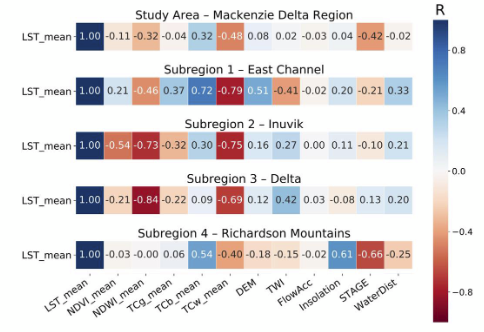

### Cloudberry hills
Here, we see that:

1. This negative relation holds for most plant communities.
2. Lichen-dominated high-centered polygon communities (HP1) and tops of the low-centered wetland polygon complexes (LW2) show a positive correlation.

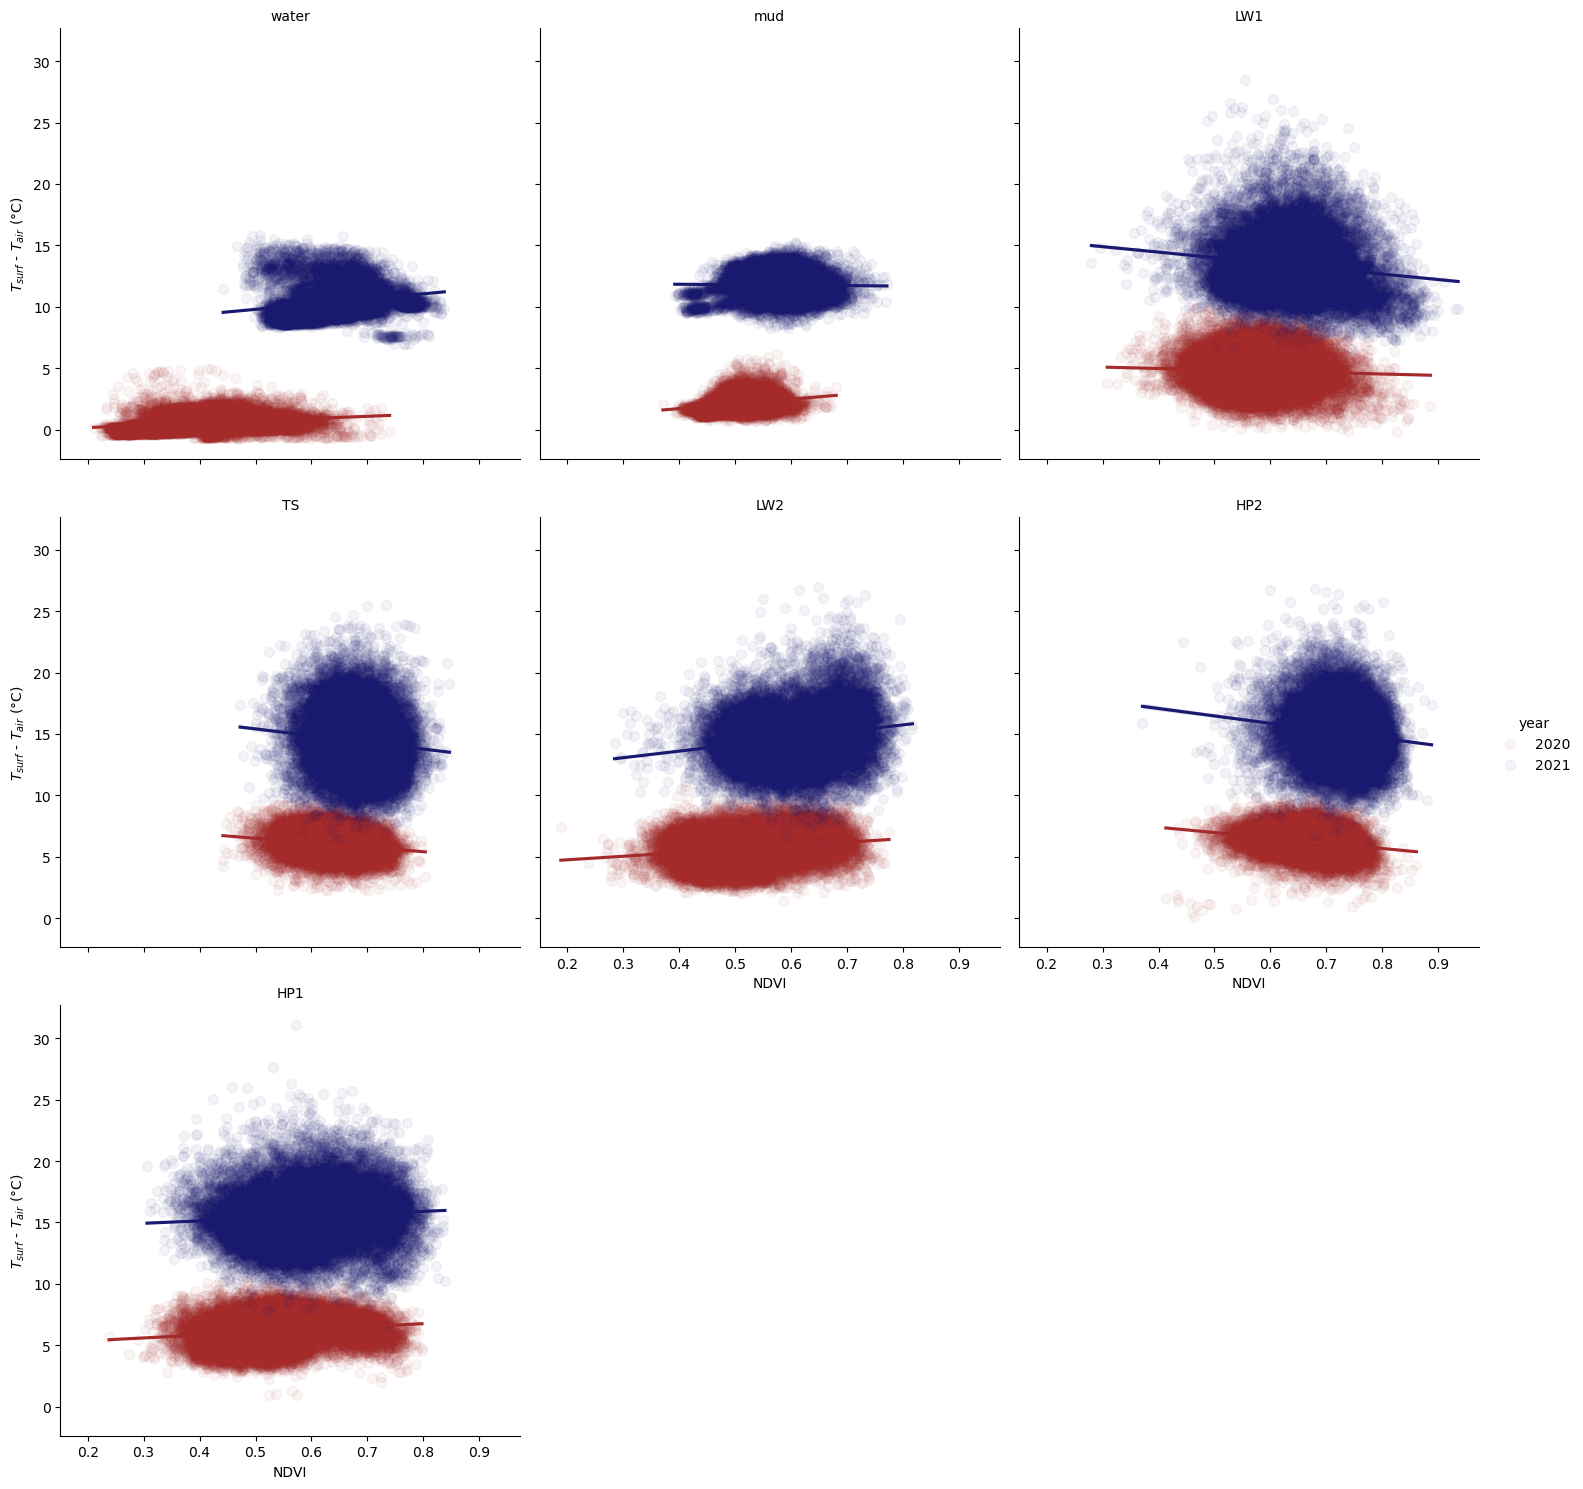

In [3]:
base_palette = {2020: "brown",2021:"midnightblue"}

i = 0
g = sns.lmplot(
        data=df_list[i],
        x="ndvi", y="deltaT", col="variable",hue = 'year',
        palette = base_palette,
        col_wrap = 3,
        height=5, scatter_kws={"s": 50, "alpha": .05}
    )
g.set(xlabel = 'NDVI',ylabel = '$T_{surf}$ - $T_{air}$ (°C)')
g.set_titles(col_template='{col_name}')
g._legend.set_alpha(1)
plt.show()

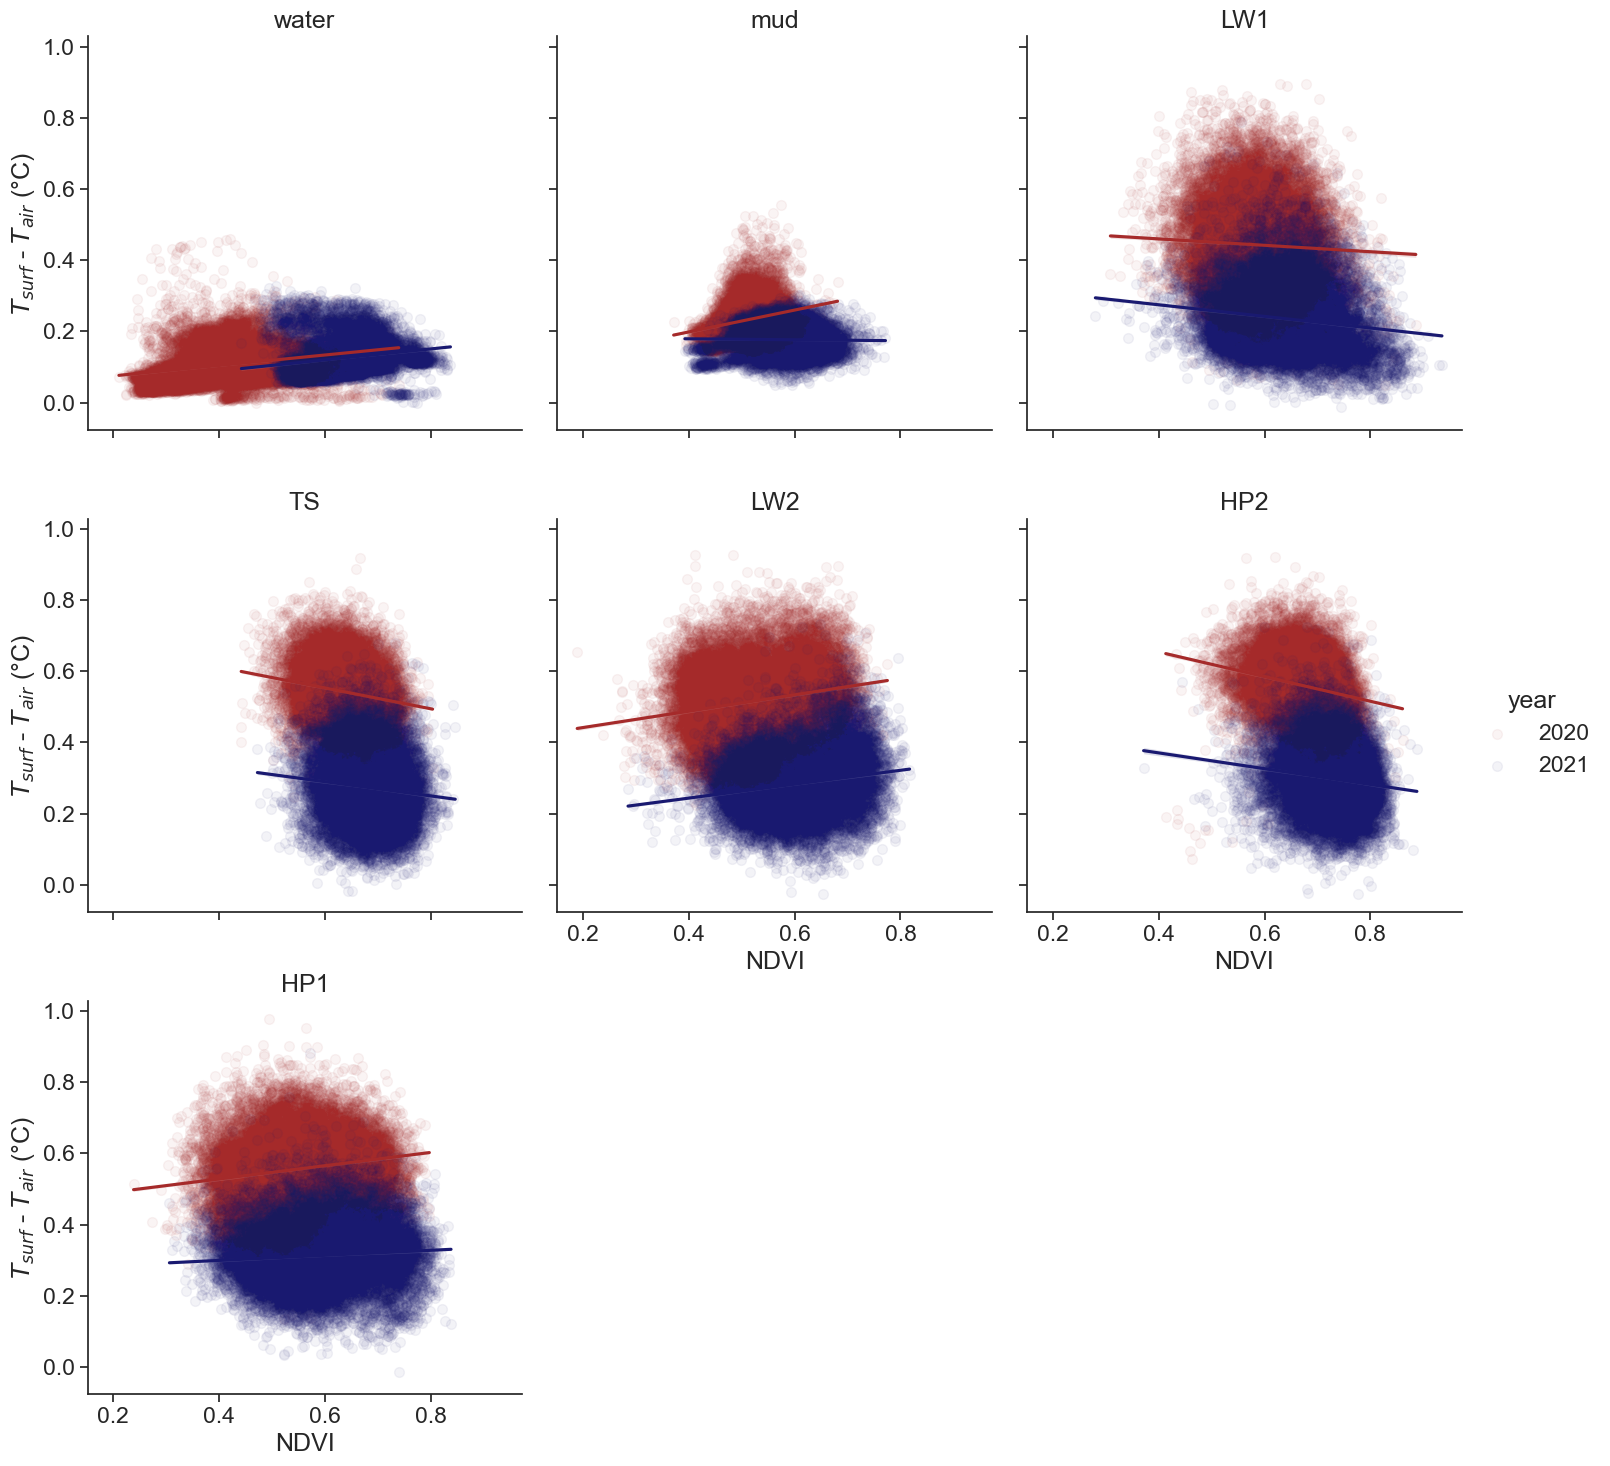

In [42]:
base_palette = {2020: "brown",2021:"midnightblue"}

j = 0
g = sns.lmplot(
        data=df_list[j],
        x="ndvi", y="wdi", col="variable",hue = 'year',
        palette = base_palette,
        col_wrap = 3,
        height=5, scatter_kws={"s": 50, "alpha": .05}
    )
g.set(xlabel = 'NDVI',ylabel = '$T_{surf}$ - $T_{air}$ (°C)')
g.set_titles(col_template='{col_name}')
g._legend.set_alpha(1)
plt.show()

The positive correlation between NDVI and $\Delta T_{surf-air}$ for the HP1 and LW2 communities is really interesting, because I  expected that when Lichen-dominated patches have low NDVI and high $\Delta T_{surf-air}$ the more mixed communities with higher NDVI have stronger land surface cooling. I suspect they may be linked to the exposed topographical position and abundance of ledum which probably has a high NDVI but weak cooling effect.

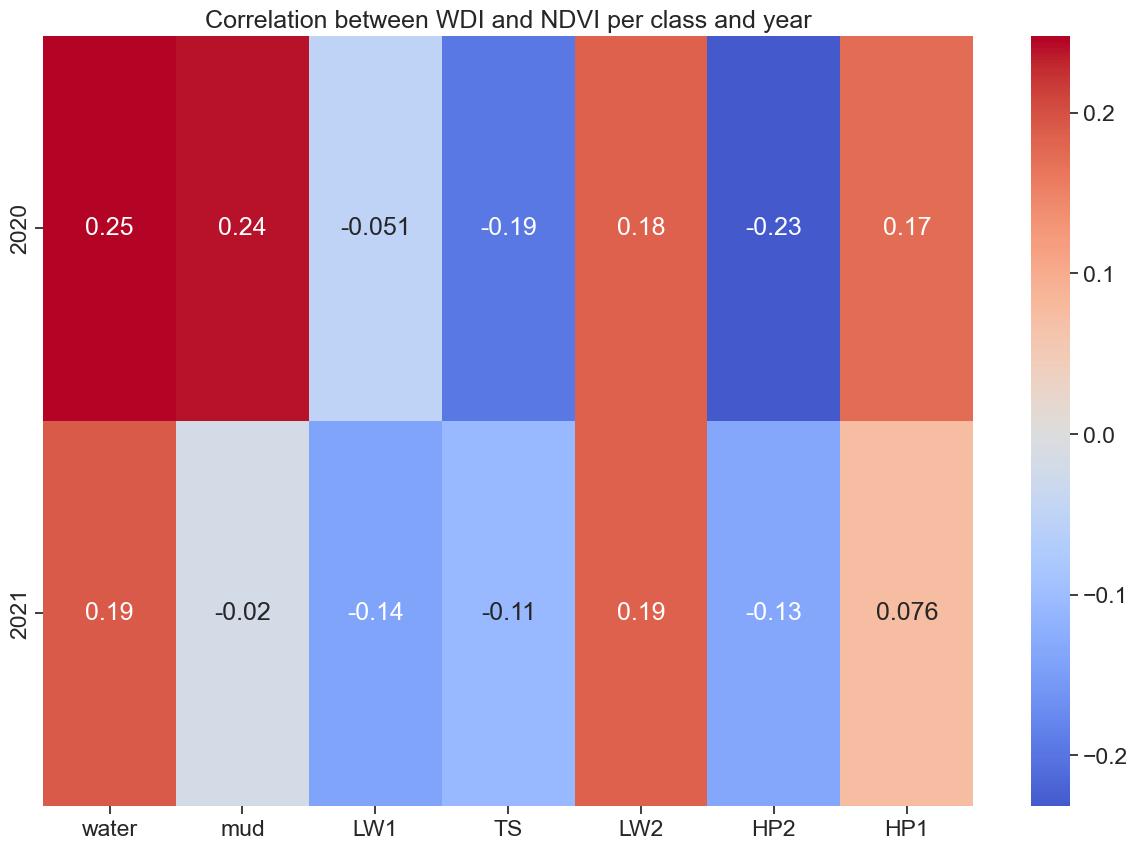

In [44]:
# Compute the correlation matrix between 'deltaT' and 'ndvi'
correlation_matrix = df_list[0].groupby(['year', 'variable'])[['wdi', 'ndvi']].corr().unstack()

# Select the correlation values between 'deltaT' and 'ndvi'
correlation_values = correlation_matrix['wdi']['ndvi']

# Reshape the correlation values as a DataFrame with 'year' as rows and 'variable' as columns
heatmap_df = correlation_values.reset_index().pivot(index='year', columns='variable', values='ndvi')

# Plot the correlation heatmap
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0)

# Set the plot title and axis labels
plt.title('Correlation between WDI and NDVI per class and year')
plt.xlabel('')
plt.ylabel('')
plt.show()

Here, I show the topographical position index of the 2020 data. 
* positive TPI = this spot is elevated compared to its surroundings (in a 5 x 5m area)
* negative TPI = this spot sits below the average elevation of its surroundings

We can see that a TPI is positively correlated with NDVI. Likely, the topographical position isn't a decisive factor why the NDVI and land surface cooling in LW2 and HP1 communities show a positive correlation while in the other communities they are negatively correlated.

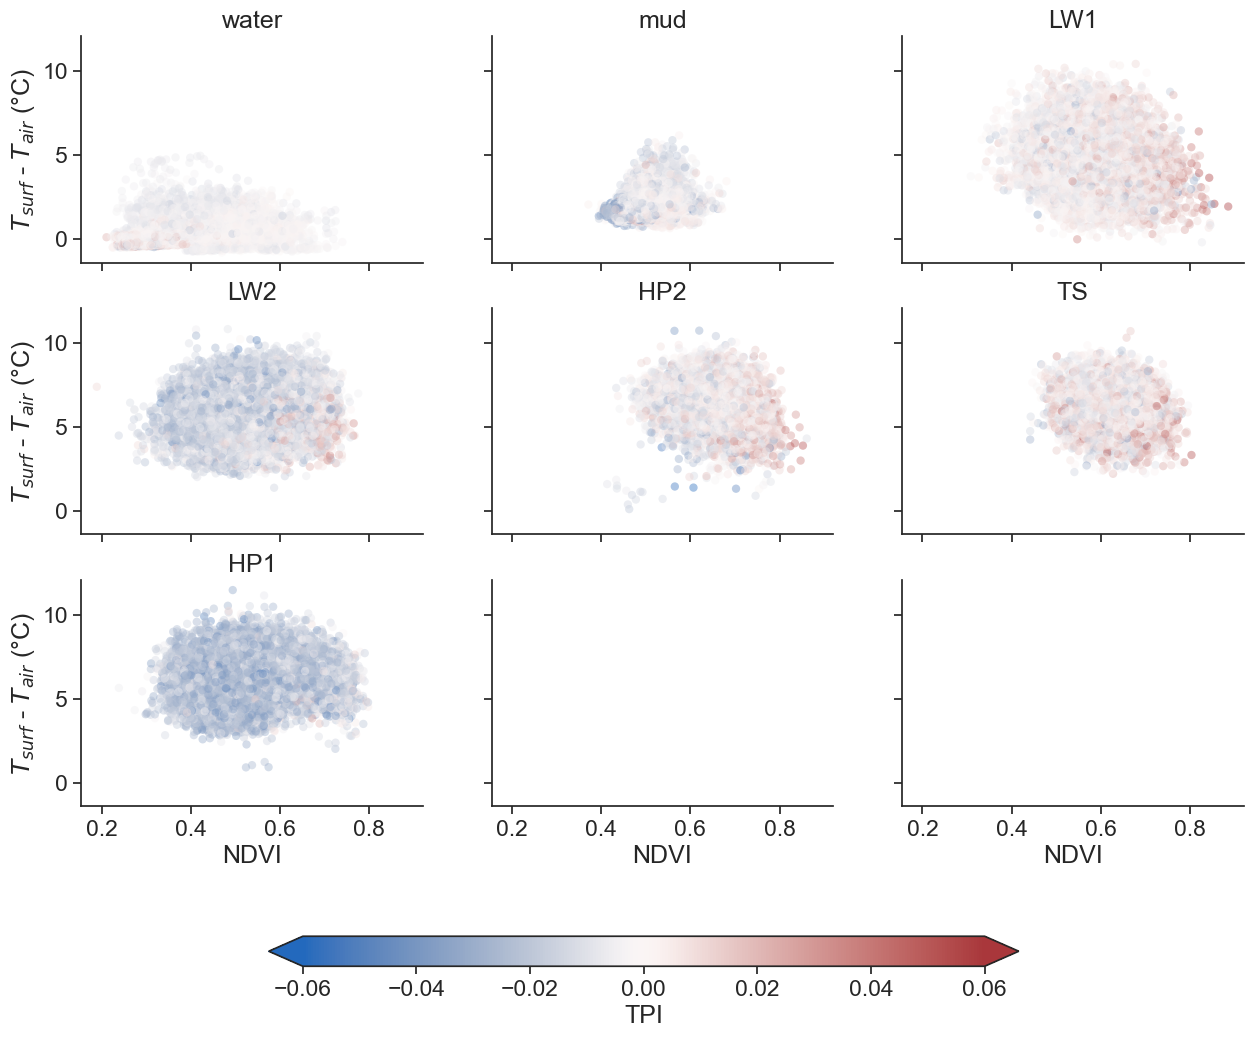

In [5]:
df = df_list[0].loc[df_list[0].year == 2020]

custom_params = {"axes.spines.right": False, "axes.spines.top": False,"figure.figsize":(15, 10)}
sns.set_theme(style="ticks",rc=custom_params,font_scale = 1.5)

fig, axes = plt.subplots(nrows=3, ncols=3,sharex = True, sharey = True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the classes and plot scatterplots
for i, cl in enumerate(['water','mud','LW1','LW2','HP2','TS','HP1']):
    ax = axes[i]
    sample_df = df[df['variable'] == cl]
    
    scatterplot = sns.scatterplot(data=sample_df, y='deltaT', x='ndvi', hue='tpi', palette='vlag',
                                  edgecolor='none', alpha=0.4, vmin=-0.06, vmax=0.06, ax=ax)
    
    ax.set_ylabel('$T_{surf}$ - $T_{air}$ (°C)')
    ax.set_xlabel('NDVI')
    ax.set_title(cl)
    
    # Remove legend for all subplots except the last one
    handles, labels = scatterplot.get_legend_handles_labels()
    scatterplot.legend_.remove()

axes[-2].set_xlabel('NDVI')
axes[-1].set_xlabel('NDVI')

cbar_ax = fig.add_axes([0.25, -0.05, 0.5, 0.03])
norm = plt.Normalize(-0.06, 0.06)
sm = plt.cm.ScalarMappable(norm=norm, cmap='vlag')
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal', extend='both')
cbar.set_label('TPI')

plt.show()

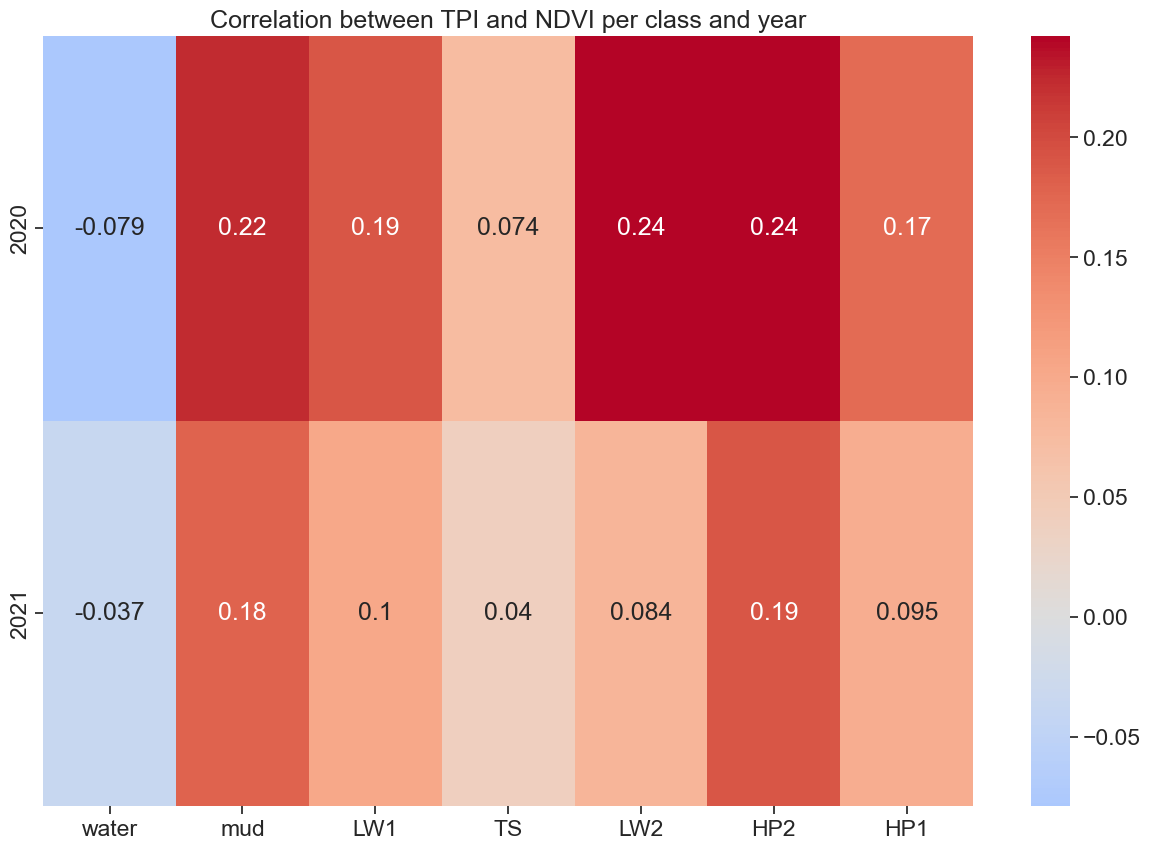

In [6]:
# Compute the correlation matrix between 'deltaT' and 'ndvi'
correlation_matrix = df_list[0].groupby(['year', 'variable'])[['tpi', 'ndvi']].corr().unstack()

# Select the correlation values between 'deltaT' and 'ndvi'
correlation_values = correlation_matrix['tpi']['ndvi']

# Reshape the correlation values as a DataFrame with 'year' as rows and 'variable' as columns
heatmap_df = correlation_values.reset_index().pivot(index='year', columns='variable', values='ndvi')

# Plot the correlation heatmap
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0)

# Set the plot title and axis labels
plt.title('Correlation between TPI and NDVI per class and year')
plt.xlabel('')
plt.ylabel('')
plt.show()

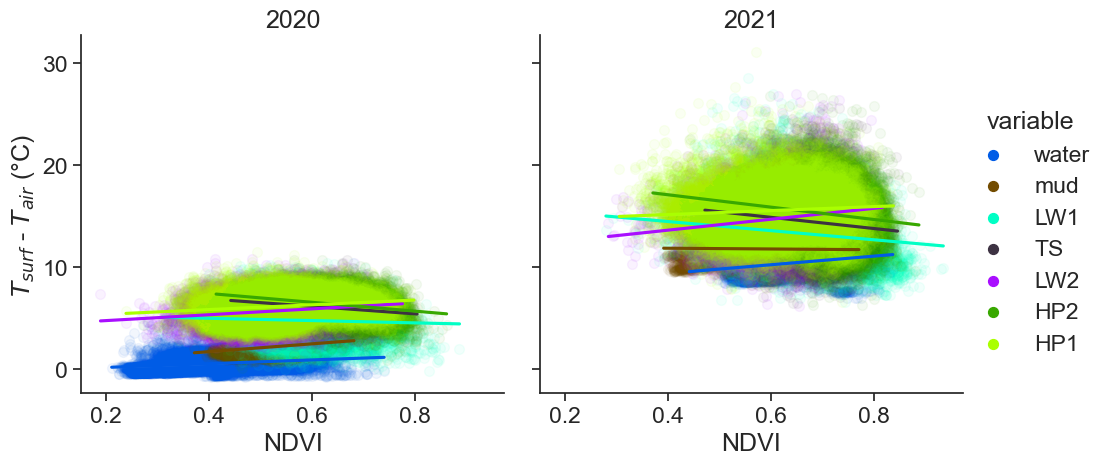

In [8]:
g = sns.lmplot(
        data=df_list[0],
        x="ndvi", y="deltaT",hue = 'variable',
        col = 'year',
        palette = colordict,
        height=5, scatter_kws={"s": 50, "alpha": .05}
    )
g.set(xlabel = 'NDVI',ylabel = '$T_{surf}$ - $T_{air}$ (°C)')
g.set_titles(col_template='{col_name}')
for lh in g._legend.legendHandles:
    lh.set_alpha(1)

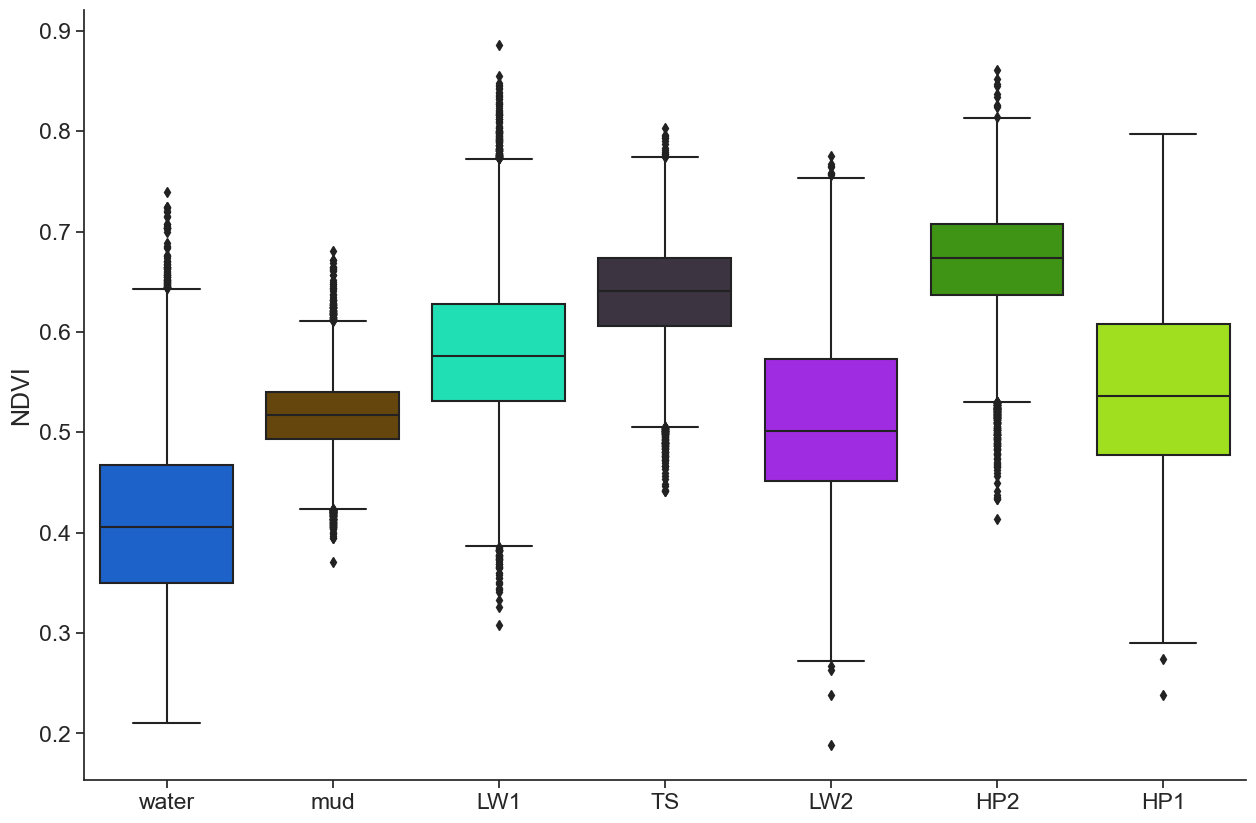

In [27]:
bp = sns.boxplot(
        data=df,
        x="variable", y="ndvi",hue = 'variable',
        palette = colordict, dodge = False
    )
bp.set(ylabel = 'NDVI',xlabel = '')
bp.get_legend().remove()
plt.show()

### Drained thaw lakebed

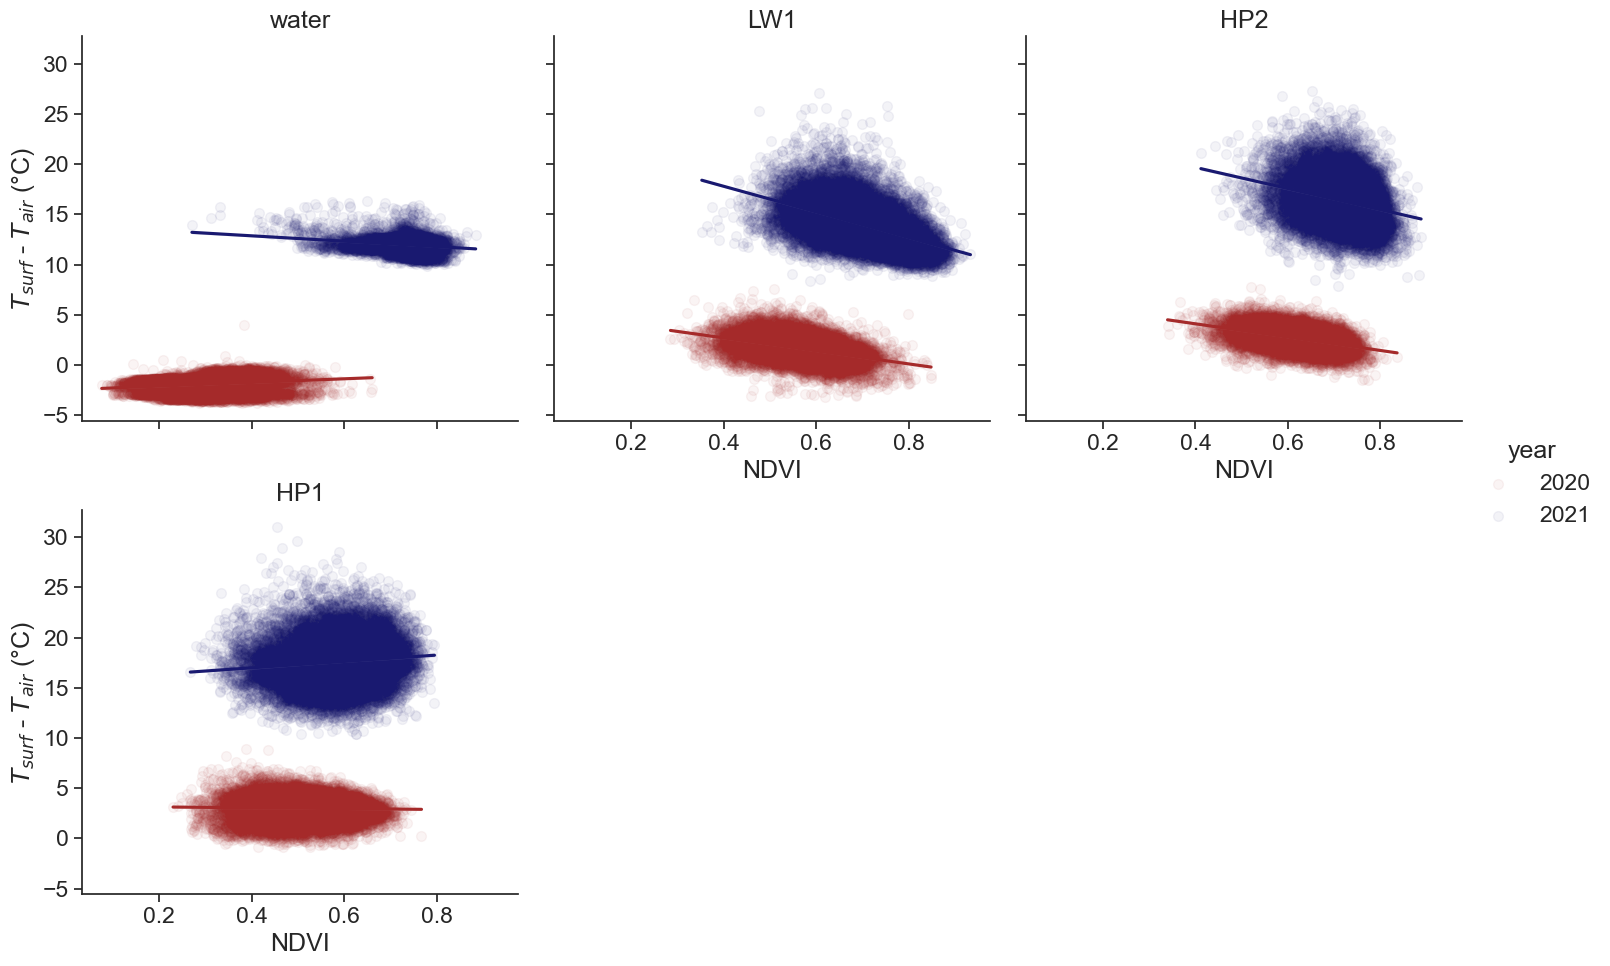

In [9]:
j = 1
g = sns.lmplot(
        data=df_list[j],
        x="ndvi", y="deltaT", col="variable",hue = 'year',
        palette = base_palette,
        col_wrap = 3,
        height=5, scatter_kws={"s": 50, "alpha": .05}
    )
g.set(xlabel = 'NDVI',ylabel = '$T_{surf}$ - $T_{air}$ (°C)')
g.set_titles(col_template='{col_name}')
g._legend.set_alpha(1)
plt.show()

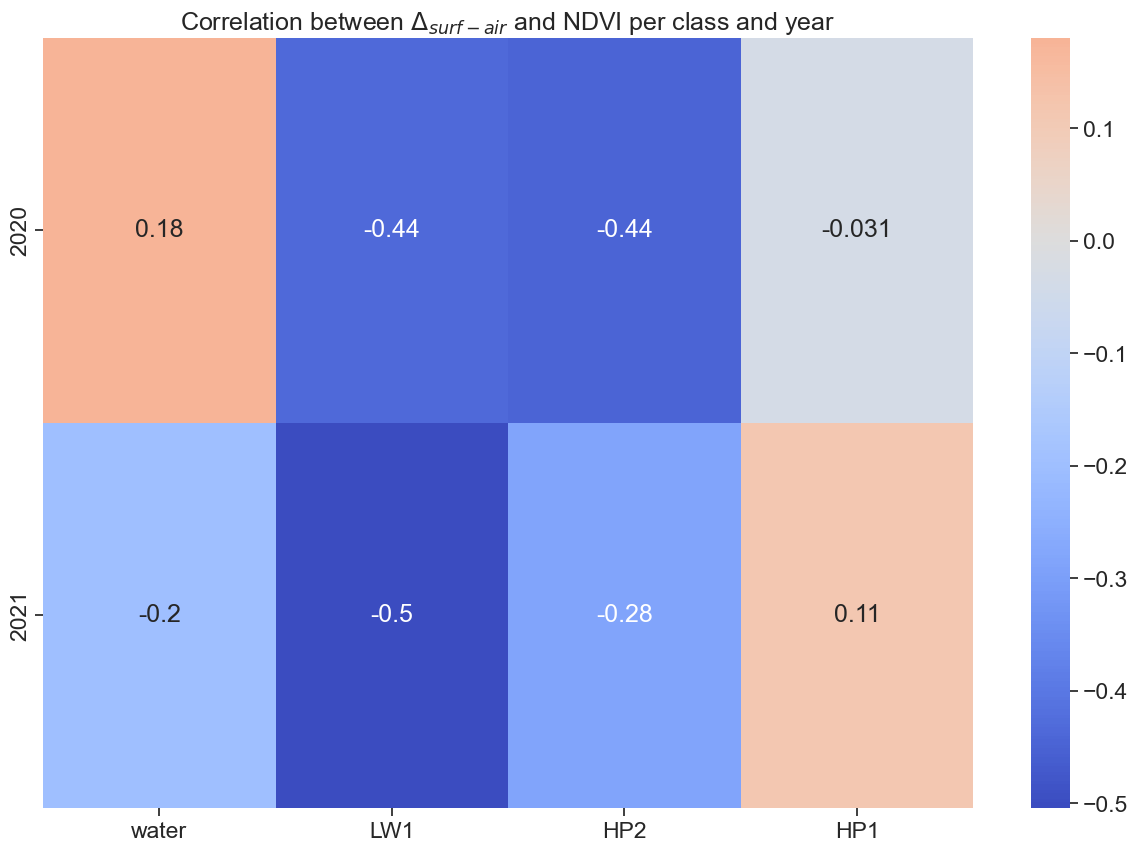

In [10]:
# Compute the correlation matrix between 'deltaT' and 'ndvi'
correlation_matrix = df_list[j].groupby(['year', 'variable'])[['deltaT', 'ndvi']].corr().unstack()

# Select the correlation values between 'deltaT' and 'ndvi'
correlation_values = correlation_matrix['deltaT']['ndvi']

# Reshape the correlation values as a DataFrame with 'year' as rows and 'variable' as columns
heatmap_df = correlation_values.reset_index().pivot(index='year', columns='variable', values='ndvi')

# Plot the correlation heatmap
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0)

# Set the plot title and axis labels
plt.title('Correlation between $\Delta_{surf - air}$ and NDVI per class and year')
plt.xlabel('')
plt.ylabel('')
plt.show()

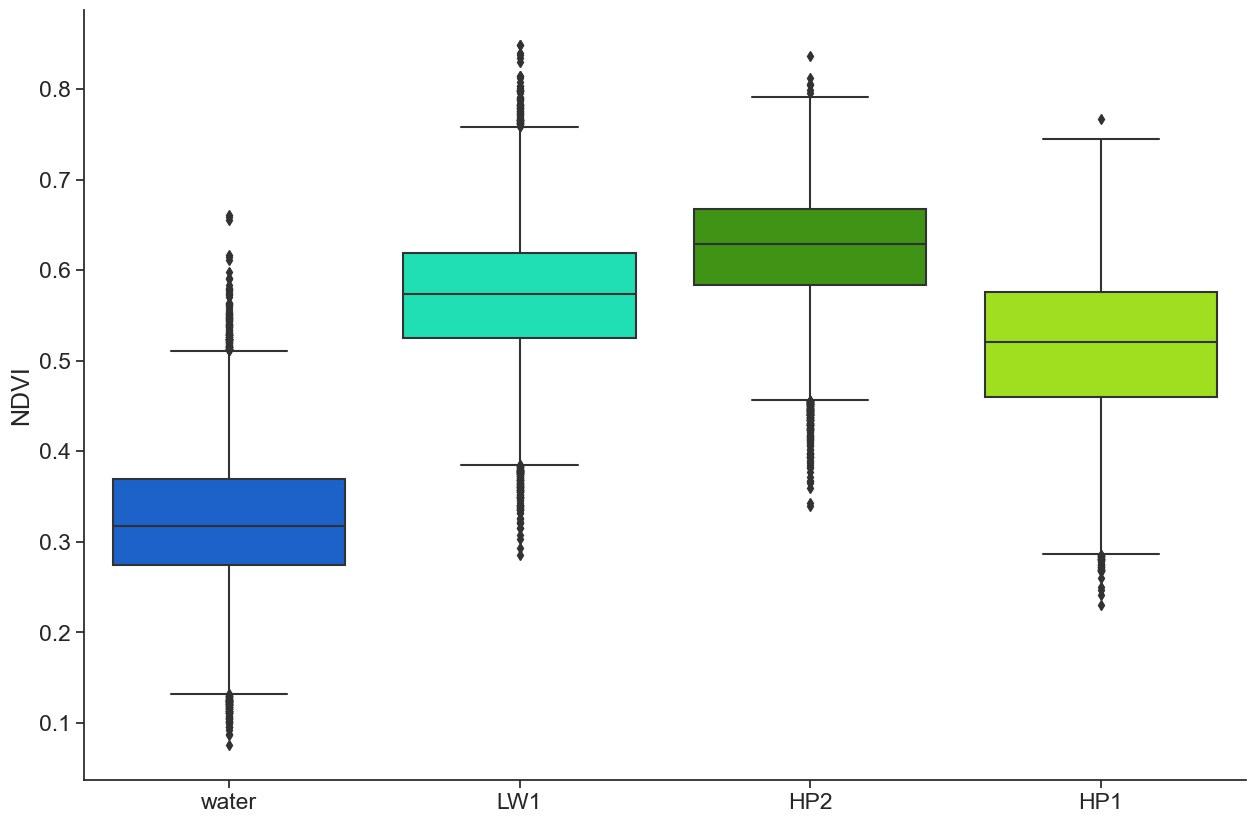

In [28]:
bp = sns.boxplot(
        data=df_list[1].loc[df_list[1].year == 2020],
        x="variable", y="ndvi",hue = 'variable',
        palette = colordict, dodge = False
    )
bp.set(ylabel = 'NDVI',xlabel = '')
bp.get_legend().remove()
plt.show()

### Ridge

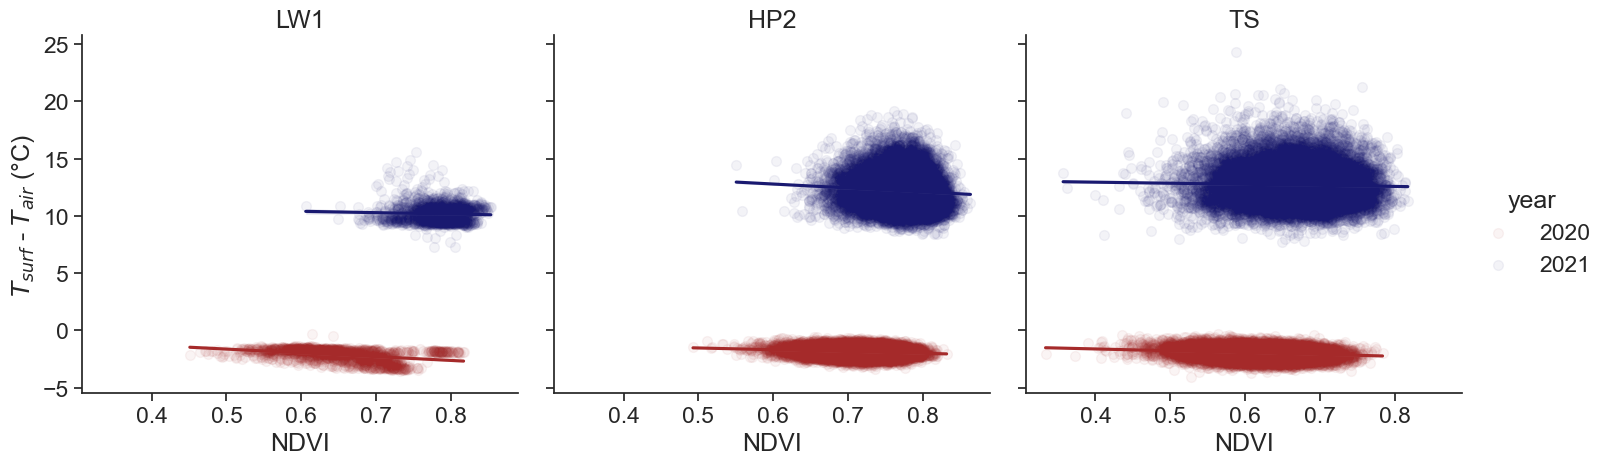

In [11]:
j = 2
g = sns.lmplot(
        data=df_list[j],
        x="ndvi", y="deltaT", col="variable",hue = 'year',
        palette = base_palette,
        col_wrap = 3,
        height=5, scatter_kws={"s": 50, "alpha": .05}
    )
g.set(xlabel = 'NDVI',ylabel = '$T_{surf}$ - $T_{air}$ (°C)')
g.set_titles(col_template='{col_name}')
g._legend.set_alpha(1)
plt.show()

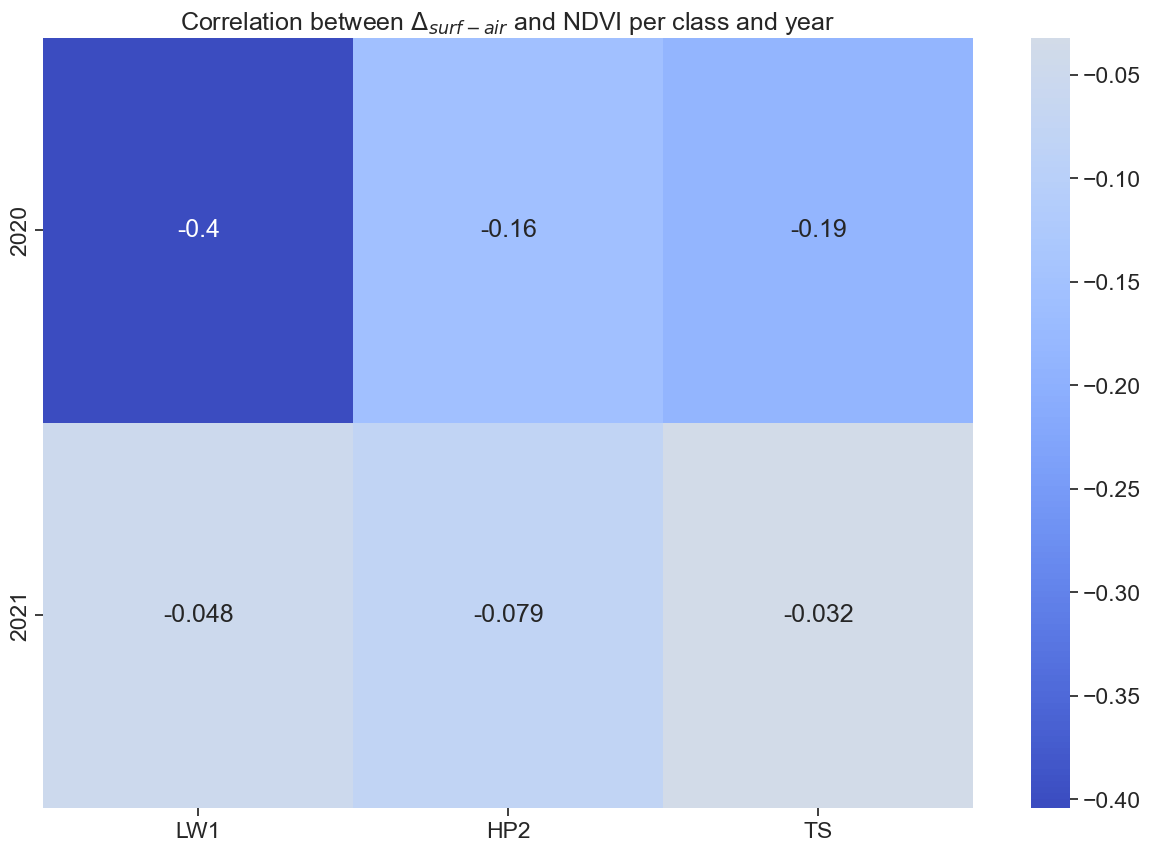

In [12]:
# Compute the correlation matrix between 'deltaT' and 'ndvi'
correlation_matrix = df_list[j].groupby(['year', 'variable'])[['deltaT', 'ndvi']].corr().unstack()

# Select the correlation values between 'deltaT' and 'ndvi'
correlation_values = correlation_matrix['deltaT']['ndvi']

# Reshape the correlation values as a DataFrame with 'year' as rows and 'variable' as columns
heatmap_df = correlation_values.reset_index().pivot(index='year', columns='variable', values='ndvi')

# Plot the correlation heatmap
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0)

# Set the plot title and axis labels
plt.title('Correlation between $\Delta_{surf - air}$ and NDVI per class and year')
plt.xlabel('')
plt.ylabel('')
plt.show()

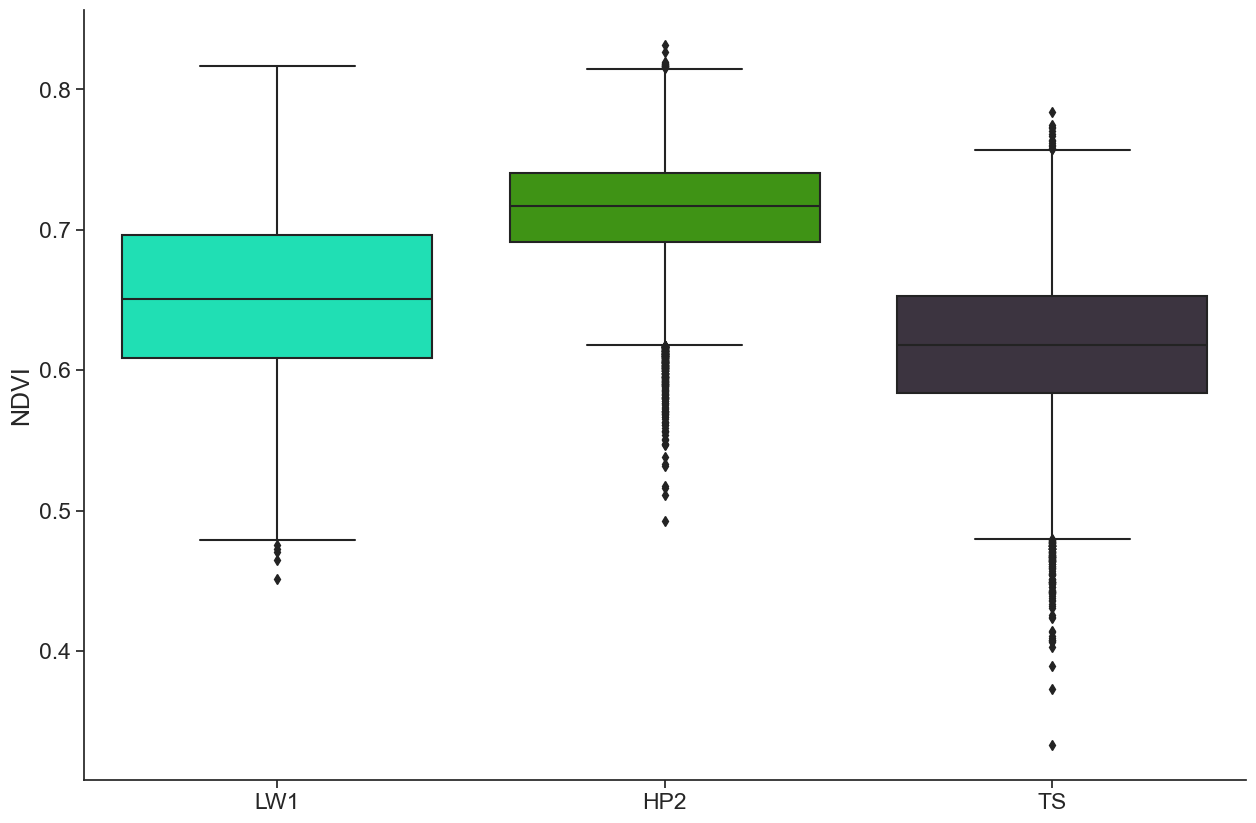

In [29]:
bp = sns.boxplot(
        data=df_list[2].loc[df_list[2].year == 2020],
        x="variable", y="ndvi",hue = 'variable',
        palette = colordict, dodge = False
    )
bp.set(ylabel = 'NDVI',xlabel = '')
bp.get_legend().remove()
plt.show()